In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataframe = pd.read_csv('./HistoricalQuotes_APPLE.csv') #Apple stock price fr 10 years, downloaded from nasdaq.com

In [3]:
dataframe = dataframe.iloc[::-1].reset_index(drop=True)

In [4]:
dataframe = dataframe.iloc[:, 3:4].values

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
scaled_price = sc.fit_transform(dataframe)

In [6]:
X_train = []
y_train = []
X_test = []
y_test = []
time_units = 128
test_size = 80 # 4 month data
for i in range(time_units, len(scaled_price)-test_size):
    X_train.append(scaled_price[i-time_units:i, 0])
    y_train.append(scaled_price[i,0])
for i in range(len(scaled_price)-test_size-1, len(scaled_price)):
    X_test.append(scaled_price[i-time_units:i, 0])
    y_test.append(scaled_price[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

In [7]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],1))

In [8]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
model = Sequential()
model.add(LSTM(return_sequences=True, units=256, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=256, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=256))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [10]:
model.fit(X_train, y_train,batch_size=32, epochs=100)

Epoch 1/100
2311/2311 [==============================] - 47s 20ms/step - loss: 0.0110
Epoch 2/100
2311/2311 [==============================] - 49s 21ms/step - loss: 8.0470e-04
Epoch 3/100
2311/2311 [==============================] - 46s 20ms/step - loss: 7.5274e-04
Epoch 4/100
2311/2311 [==============================] - 46s 20ms/step - loss: 8.7144e-04
Epoch 5/100
2311/2311 [==============================] - 49s 21ms/step - loss: 7.8615e-04
Epoch 6/100
2311/2311 [==============================] - 50s 21ms/step - loss: 8.3488e-04
Epoch 7/100
2311/2311 [==============================] - 49s 21ms/step - loss: 7.5699e-04
Epoch 8/100
2311/2311 [==============================] - 50s 22ms/step - loss: 8.2501e-04
Epoch 9/100
2311/2311 [==============================] - 51s 22ms/step - loss: 7.5896e-04
Epoch 10/100
2311/2311 [==============================] - 52s 23ms/step - loss: 7.0265e-04
Epoch 11/100
2311/2311 [==============================] - 52s 23ms/step - loss: 6.8901e-04
Epoch 12/100

2311/2311 [==============================] - 48s 21ms/step - loss: 3.1455e-04
Epoch 92/100
2311/2311 [==============================] - 49s 21ms/step - loss: 3.6307e-04
Epoch 93/100
2311/2311 [==============================] - 50s 22ms/step - loss: 3.3754e-04
Epoch 94/100
2311/2311 [==============================] - 49s 21ms/step - loss: 3.9353e-04
Epoch 95/100
2311/2311 [==============================] - 49s 21ms/step - loss: 3.3425e-04
Epoch 96/100
2311/2311 [==============================] - 49s 21ms/step - loss: 3.4969e-04
Epoch 97/100
2311/2311 [==============================] - 49s 21ms/step - loss: 3.5562e-04
Epoch 98/100
2311/2311 [==============================] - 49s 21ms/step - loss: 3.0269e-04
Epoch 99/100
2311/2311 [==============================] - 49s 21ms/step - loss: 3.1520e-04
Epoch 100/100
2311/2311 [==============================] - 51s 22ms/step - loss: 2.9843e-04


In [14]:
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
predicted_price = model.predict(X_test[1:])

In [15]:
y_test = y_test.reshape((y_test.shape[0],1))

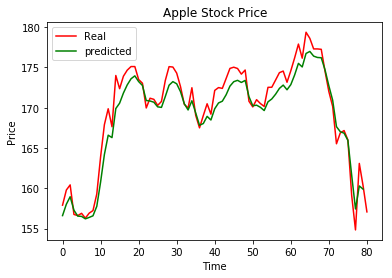

In [16]:
predicted_price = sc.inverse_transform(predicted_price)
real_price = sc.inverse_transform(y_test)
plt.plot(real_price, color = 'red', label='Real')
plt.plot(predicted_price, color = 'green', label = 'predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Apple Stock Price')
plt.legend()
plt.show()

In [17]:
from keras.models import load_model

In [18]:
model.save('apple_stock_price.h5')